### 第一题

sklearn的KNN函数实现鸢尾花分类

使用sklearn的鸢尾花数据集，该数据集包含Iris花的三个品种(Iris setosa, Iris virginica and Iris versicolor)各50个样本，

每个样本还有4个特征参数（分别是萼片的长宽和花瓣的长宽，以厘米为单位）

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

（1）算法的实现过程：

（2）数据收集/加载

（3）数据预处理

（4）数据划分

（5）模型建立

（6）交叉验证

（7）模型验证与评估

```
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X, y)
## 画一下数据的分布（前两个维度）
code here
## # 把数据分成训练数据和测试数据
code here
## # 构建KNN模型， K值为3、并做训练
code here
#计算准确率
code here
```

#### 数据加载

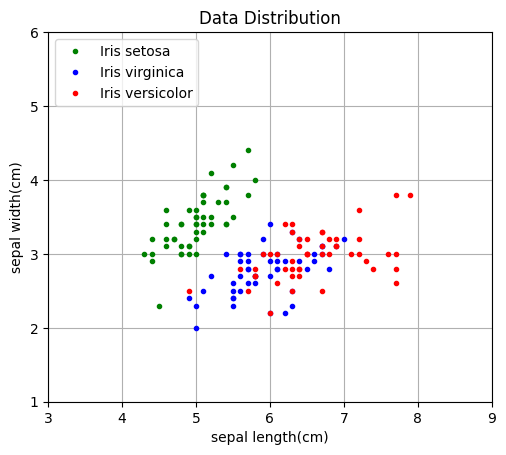

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
#加载数据库
iris = datasets.load_iris() 
X = iris.data
y = iris.target
#print (X, y)

#画出前两个维度的数据分布
from matplotlib import pyplot as plt
plt.figure()
plt.title("Data Distribution")
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
for i in range(1,X.shape[0]):
    t=plt.plot(X[i,0],X[i,1],'.',color="green" if y[i]==0 else ("blue" if y[i]==1 else "red"))
    if y[i]==0:
        plt0,=t
    elif y[i]==1:
        plt1,=t
    else:
        plt2,=t
plt.axis([3,9,1,6])
plt.legend([plt0,plt1,plt2],["Iris setosa", "Iris virginica", "Iris versicolor"],loc="upper left")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 数据预处理

In [2]:
#进行标准归一化
for i in range(0,4):
    mean=X[:,i].mean()
    sigma=np.sqrt(np.var(X[:,i],ddof=1))
    for j in range(0,len(X[:,i])):
        X[j,i]=(X[j,i]-mean)/sigma

也可以使用sklearn的StandardScaler进行标准归一化

```
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
```

#### 数据划分

In [3]:

#把数据分为训练数据和测试数据
#将每种鸢尾花的前25个用于训练数据，后25个用于测试数据
#即测试集和训练集各50%
X_train0,X_test0,y_train0,y_test0=train_test_split(X[:50,:],y[:50],test_size=0.5,random_state=42)
X_train1,X_test1,y_train1,y_test1=train_test_split(X[50:100,:],y[50:100],test_size=0.5,random_state=42)
X_train2,X_test2,y_train2,y_test2=train_test_split(X[100:150,:],y[100:150],test_size=0.5,random_state=42)
X_train,X_test,y_train,y_test=np.concatenate((X_train0,X_train1,X_train2),axis=0),np.concatenate((X_test0,X_test1,X_test2),axis=0),np.concatenate((y_train0,y_train1,y_train2),axis=0),np.concatenate((y_test0,y_test1,y_test2),axis=0)

#### 利用sklearn实现KNN

In [4]:
#构建KNN模型，K=3，并做训练
def knn_by_sklearn(k):
    neigh=KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)
    y_predict=neigh.predict(X_test)

    print(f"y_test:\n{y_test}")
    print(f"y_predict:\n{y_predict}")

    return y_predict

y_predict=knn_by_sklearn(3)
#计算准确率和混淆矩阵
error=0
matrix=np.zeros((3,3),dtype=int)
for i in range(0,len(y_predict)):
    matrix[y_predict[i]][y_test[i]]+=1
    if y_predict[i]!=y_test[i]:
        error=error+1
import pandas as pd
confusionMatrix=pd.DataFrame(matrix,columns=["Iris setosa", "Iris virginica", "Iris versicolor"],index=["Iris setosa", "Iris virginica", "Iris versicolor"])


print(f"ErrorRate={round(error/len(y_predict)*100,3)}%")
print("Confusion Matrix:")
print(confusionMatrix)

y_test:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
y_predict:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1
 2]
ErrorRate=6.667%
Confusion Matrix:
                 Iris setosa  Iris virginica  Iris versicolor
Iris setosa               24               0                0
Iris virginica             1              24                3
Iris versicolor            0               1               22


### 第二题

#### 从零开始实现KNN

In [5]:
from sklearn import datasets
from collections import Counter # 为了找出k个最近邻居中最多的标签
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
# 此处为伪随机选取数据集的25%作为测试数据，75%作为训练数据
# (如果此处改用之前的数据导入方法，结果将和sklearn的KNN模型一样)
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    dist = np.linalg.norm(instance1-instance2)
    return dist

def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据array型
    k: 选择多少个neighbors?
    """
    #返回testInstance的预测标签= {0,1,2}
    dist_list=[]
    for i in range(0,X.shape[0]):
        dist_list.append(euc_dis(X[i,:],testInstance))
    sort_index=np.array(dist_list).argsort()[:k]
    counter=Counter(y[sort_index])
    result=counter.most_common(1)[0][0]
    # print(result)
    return result

# 预测结果
y_predict=[]
for i in range(0,X_test.shape[0]):
    y_predict.append(knn_classify(X_train,y_train,X_test[i,:],3))
y_predict=np.array(y_predict)

#计算准确率和混淆矩阵
error=0
matrix=np.zeros((3,3),dtype=int)
for i in range(0,len(y_predict)):
    matrix[y_predict[i]][y_test[i]]+=1
    if y_predict[i]!=y_test[i]:
        error=error+1
import pandas as pd
confusionMatrix=pd.DataFrame(matrix,columns=["Iris setosa", "Iris virginica", "Iris versicolor"],index=["Iris setosa", "Iris virginica", "Iris versicolor"])

print(f"y_test=\n{y_test}")
print(f"y_predict=\n{y_predict}")
print(f"ErrorRate={round(error/len(y_predict)*100,3)}%")
print("Confusion Matrix:")
print(confusionMatrix)

y_test=
[1 0 1 1 1 1 1 1 1 1 0 0 0 1 2 0 2 2 1 0 1 2 1 1 0 1 1 2 1 2 0 0 1 1 0 1 2
 0]
y_predict=
[1 0 1 2 1 1 1 1 1 1 0 0 0 1 2 0 2 2 2 0 1 2 1 1 0 1 2 2 1 2 0 0 1 1 0 1 2
 0]
ErrorRate=7.895%
Confusion Matrix:
                 Iris setosa  Iris virginica  Iris versicolor
Iris setosa               11               0                0
Iris virginica             0              17                0
Iris versicolor            0               3                7
